# Linear Regression

🎯 In this exercise, you will model the performance of a NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [1]:
import pandas as pd

data = pd.read_csv("NBA.csv")
data.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define the feature set and target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` the target.

In [2]:
X = data[['mp']]
y = data['win_rating']

👇 In a scatter plot ([doc](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)) , visualize the relationship between the rating and the minutes played.

<AxesSubplot:xlabel='mp', ylabel='win_rating'>

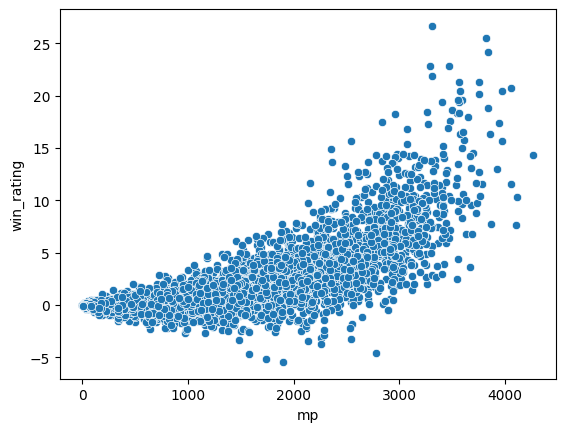

In [3]:
import seaborn as sns

sns.scatterplot(data=data, x='mp', y='win_rating')

ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Cross-validation

👇 Using Sklearn's `cross_validate` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)), run a 5-fold cross validation on a `LinearRegression` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) model predicting the player performance rating from minutes played. Save the raw output of the cross validation under a new variable `cv_results`.

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
    
model = LinearRegression()

cv_results = cross_validate(model, X, y, cv=5)
cv_results

{'fit_time': array([0.00588512, 0.00235105, 0.00286412, 0.00179696, 0.00137806]),
 'score_time': array([0.00164795, 0.00138712, 0.00113916, 0.0008812 , 0.00075698]),
 'test_score': array([0.5555057 , 0.53447908, 0.53790391, 0.57658459, 0.57917762])}

❓ What is the lowest score of the cross validation? Compute your answer and save the value under new variable `min_score`.

In [47]:
min_score = min(cv_results['test_score'])
min_score

0.5344790822272503

❓ What is the highest score of the cross validation?  Compute your answer and save the value under new variable `max_score`.

In [48]:
max_score = max(cv_results['test_score'])
max_score

0.5791776193355005

❓ What is the mean score of the cross validation? Compute your answer and save the value under new variable `mean_score`.

In [49]:
mean_score = cv_results['test_score'].mean()
mean_score

0.5567301800068911

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [50]:
from nbresult import ChallengeResult

result = ChallengeResult('cv_results',
                         cv_result = cv_results,
                         mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/florencetersier/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/florencetersier/code/FDLData/data-linear-regression/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as K folds increases from 2 until 20.

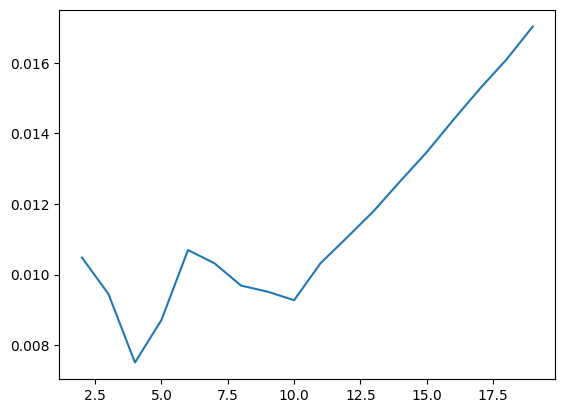

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
    
model = LinearRegression()

computational_time = []

for k in range(2,20,1):
    cv_results = cross_validate(model, X, y, cv=k)
    computational_time.append(cv_results['fit_time'].sum() + cv_results['score_time'].sum())
    

range_k = list(range(2,20,1))
plt.plot(range_k, computational_time)

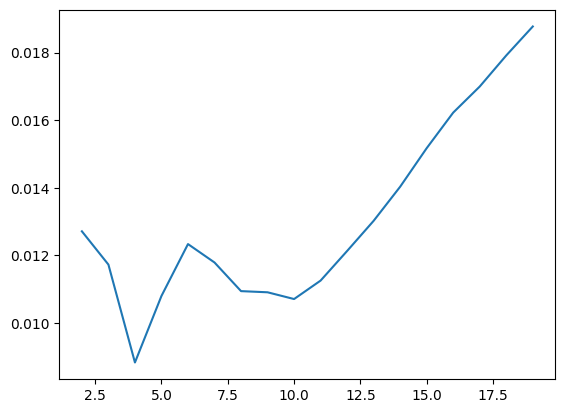

In [7]:
import time
import resource 
import matplotlib.pyplot as plt

computational_time = []

for k in range(2,20,1):
    time_start = time.perf_counter()
    cross_validate(model, X, y, cv=k)    
    computational_time.append(time.perf_counter() - time_start)

range_k = list(range(2,20,1))
plt.plot(range_k, computational_time)

(0.5, 0.6)

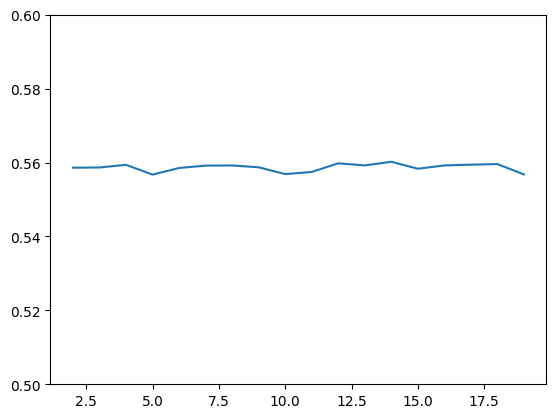

In [34]:
mean_scores = []

for k in range(2,20,1):
    time_start = time.perf_counter()
    cv_results_k = cross_validate(model, X, y, cv=k)    
    mean_scores.append(cv_results_k['test_score'].mean())

plt.plot(range_k, mean_scores)
plt.ylim(0.5,0.6)

ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the model

Cross validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross validation. 

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict!). Save the trained model under the variable `model`.

In [52]:
model = model.fit(X,y)

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under variable name `slope`.

In [62]:
slope = model.coef_[0]
slope

0.0026025799386401927

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under variable name `intercept`.

In [64]:
intercept = model.intercept_
intercept

-1.546374937163944

🤔 Make sure you understand how to interpret these coefficients before moving on.

### ☑️ Test your code

In [65]:
from nbresult import ChallengeResult

result = ChallengeResult('trained_model',
                         slope = slope,
                         intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/florencetersier/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/florencetersier/code/FDLData/data-linear-regression/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



## 4. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted price in a variable called `prediction`.

In [68]:
prediction = model.predict([[1000]])
prediction

/Users/florencetersier/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.056205])

### ☑️ Test your code

In [67]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/florencetersier/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/florencetersier/code/FDLData/data-linear-regression/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



## 5. Improving the model with more features

Your friend who enjoys NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

<AxesSubplot:xlabel='poss', ylabel='win_rating'>

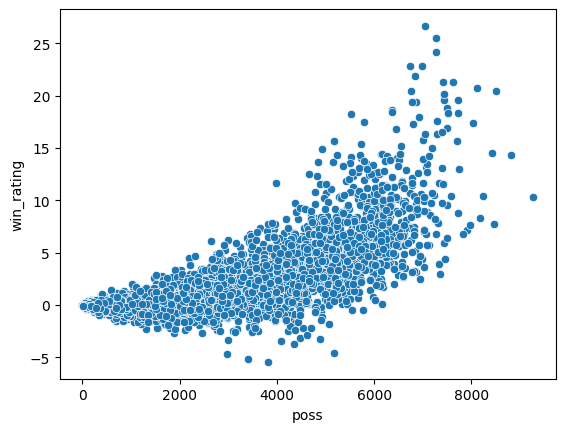

In [71]:
sns.scatterplot(data=data, x='poss', y='win_rating')

<AxesSubplot:xlabel='do_ratio', ylabel='win_rating'>

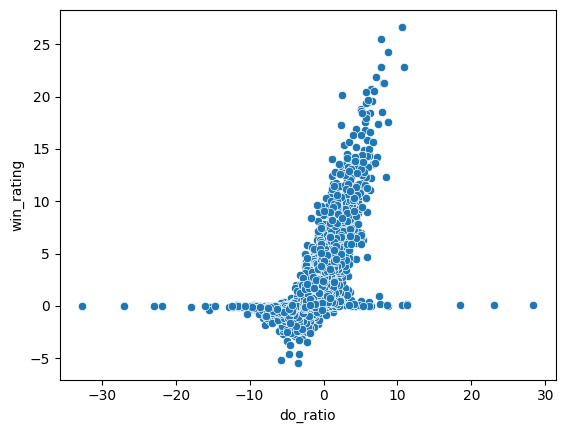

In [72]:
sns.scatterplot(data=data, x='do_ratio', y='win_rating')

<AxesSubplot:xlabel='pacing', ylabel='win_rating'>

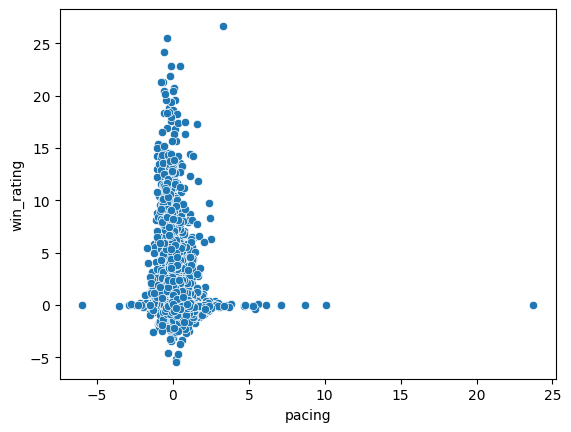

In [73]:
sns.scatterplot(data=data, x='pacing', y='win_rating')

<details>
    <summary>💡 Click here for a hint</summary>
    A seaborn <code>regplot</code> might be very handy here.
</details>

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [81]:
X_bis = data[['mp', 'do_ratio']]

❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [82]:
model_bis = LinearRegression()

cv_results_bis = cross_validate(model_bis, X_bis, y, cv=5)

mean_2_feat_score = cv_results_bis['test_score'].mean()
mean_2_feat_score

0.6317728310765245

### ☑️ Test your code

In [83]:
from nbresult import ChallengeResult

result = ChallengeResult('improved_score',
                         improved_score = mean_2_feat_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/florencetersier/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/florencetersier/code/FDLData/data-linear-regression/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_improved_score.py::TestImprovedScore::test_improved_score PASSED    [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/improved_score.pickle

git commit -m 'Completed improved_score step'

git push origin master



You should see an **increase of around 8%** to your $R^2$ 👏

Congrats you just performed your first manual *feature selection* - we'll see more ways to do that this week!

🤔 But is this the best we can do with Linear Regression? Let's explore more in the next challenge!

# 🏁